In [4]:
set.seed(1)
NX <- 100
NY <- 100
X <- rep(seq(1, NX, 1), times=NY)
S <- runif(NX, 0, 5)
Y <- sapply(X, function(x){rnorm(1, x, S[x])})
D <- data.frame(X=X, Y=Y)

In [5]:
l <- nrow(D[D$X==(unique(D$X)[1]),])
ui <- l - l * (0.05 / 2)
li = l * (0.05 / 2)
DS <- data.frame(
  X=unique(X),
  mean=sapply(unique(X), function(x){mean(D[D$X==x, 'Y'])}),
  median=sapply(unique(X), function(x){mean(D[D$X==x, 'Y'])}),
  UCI95=sapply(unique(X), function(x){sort((D[D$X==x, 'Y']))[ui]}),
  LCI95=sapply(unique(X), function(x){sort((D[D$X==x, 'Y']))[li]})
)

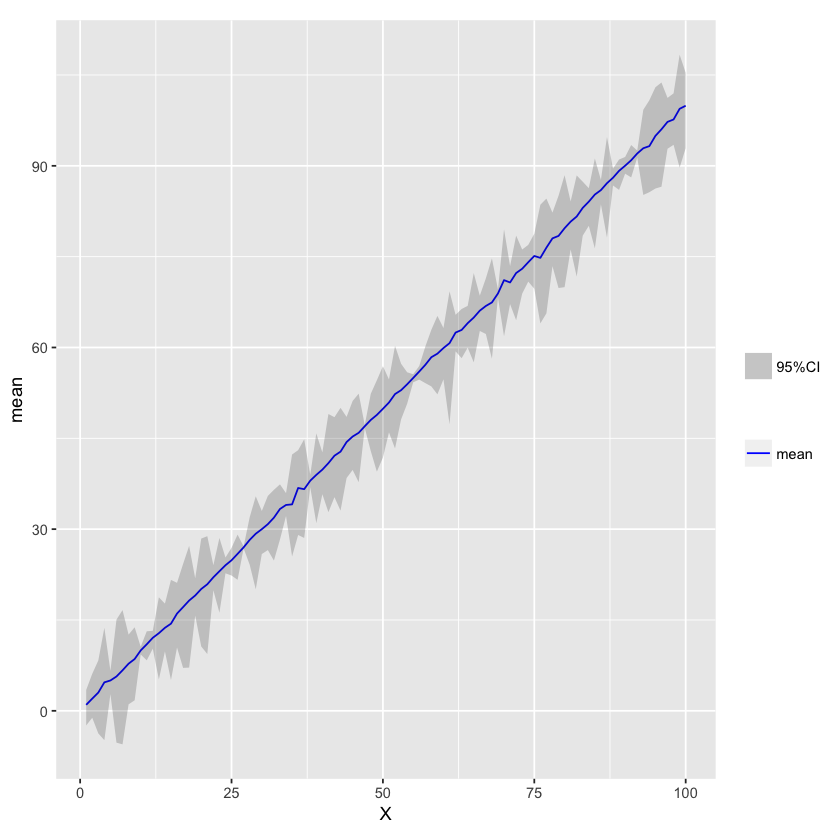

In [6]:
library(ggplot2)
h <- ggplot(DS, aes(x=X))
h + geom_line(aes(y=mean, colour="mean")) +
geom_ribbon(aes(ymin=LCI95,ymax=UCI95, fill="95%CI"), alpha=0.2) +
scale_colour_manual("",values="blue") +
scale_fill_manual("",values="grey12") +
coord_fixed()